In [1]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
import plotly.express as px
from scipy import stats
from datetime import datetime
from scipy.stats import norm, skew
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
sns.set()

In [2]:
data = pd.read_csv('BigMartdataset.csv')
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [3]:

train_data.shape, test_data.shape,data.shape


((8523, 12), (5681, 11), (5681, 4))

In [4]:
train_data.head(5)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [5]:
test_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [6]:
train_data.columns 

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Exploratory Data Analysis

In [8]:
#lets merge the train data and  the test data
# Create source feature to concat train and test data together
#we need to predict iten_outlet_sales for the given dataset so we will fill the values with 0
train_data['source']='train'
test_data['source']='test'
test_data['Item_Outlet_Sales'] = 0
df = pd.concat([train_data, test_data],ignore_index=True,sort= False)
df.head()



Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  
0  Supermarket Type1          3735.1380  train  
1  Supermarket Type2           443.4228  train  
2  Supermarket Type1          2097.2700  train  
3      Grocery Store           732.3800  train  
4  Supermarket Type1           994.7052  train

In [9]:
df.shape

(14204, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [11]:
df.nunique()
# another way of doing this       df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [12]:
display(f"Length of dataframe : {len(df)}")

'Length of dataframe : 14204'

In [13]:
df.describe(include= 'all').T
#transpose


count unique                    top  freq  \
Item_Identifier              14204   1559                  FDU15    10   
Item_Weight                11765.0    NaN                    NaN   NaN   
Item_Fat_Content             14204      5                Low Fat  8485   
Item_Visibility            14204.0    NaN                    NaN   NaN   
Item_Type                    14204     16  Fruits and Vegetables  2013   
Item_MRP                   14204.0    NaN                    NaN   NaN   
Outlet_Identifier            14204     10                 OUT027  1559   
Outlet_Establishment_Year  14204.0    NaN                    NaN   NaN   
Outlet_Size                  10188      3                 Medium  4655   
Outlet_Location_Type         14204      3                 Tier 3  5583   
Outlet_Type                  14204      4      Supermarket Type1  9294   
Item_Outlet_Sales          14204.0    NaN                    NaN   NaN   
source                       14204      2                  train  8523   

                                  mean          std     min       25%  \
Item_Identifier                    NaN          NaN     NaN       NaN   
Item_Weight                  12.792854     4.652502   4.555      8.71   
Item_Fat_Content                   NaN          NaN     NaN       NaN   
Item_Visibility               0.065953     0.051459     0.0  0.027036   
Item_Type                          NaN          NaN     NaN       NaN   
Item_MRP                    141.004977    62.086938   31.29    94.012   
Outlet_Identifier                  NaN          NaN     NaN       NaN   
Outlet_Establishment_Year  1997.830681     8.371664  1985.0    1987.0   
Outlet_Size                        NaN          NaN     NaN       NaN   
Outlet_Location_Type               NaN          NaN     NaN       NaN   
Outlet_Type                        NaN          NaN     NaN       NaN   
Item_Outlet_Sales          1308.865489  1699.791423     0.0       0.0   
source                             NaN          NaN     NaN       NaN   

                                50%        75%         max  
Item_Identifier                 NaN        NaN         NaN  
Item_Weight                    12.6      16.75       21.35  
Item_Fat_Content                NaN        NaN         NaN  
Item_Visibility            0.054021   0.094037    0.328391  
Item_Type                       NaN        NaN         NaN  
Item_MRP                    142.247   185.8556    266.8884  
Outlet_Identifier               NaN        NaN         NaN  
Outlet_Establishment_Year    1999.0     2004.0      2009.0  
Outlet_Size                     NaN        NaN         NaN  
Outlet_Location_Type            NaN        NaN         NaN  
Outlet_Type                     NaN        NaN         NaN  
Item_Outlet_Sales           559.272  2163.1842  13086.9648  
source                          NaN        NaN         NaN

In [14]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [15]:
#lets ccheck the null values
#Some observations 
#1 Item_Visibility has a min value of zero. This makes no practical sense because 
#when a product is being sold in a store, 
#the visibility cannot be 0.

#2 Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather
#, if we can convert them to how old the particular store is, it should have a better impact on sales.

#3 The lower ‘count’ of Item_Weight and Outlet_Size confirms the findings from the missing value check.

df.isnull().sum().sort_values(ascending=True,inplace=False)

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
Item_Weight                  2439
Outlet_Size                  4016
dtype: int64

In [16]:
#lets check the percentage of missing values 
#first the total % of missing values
missing_values = df.isnull().sum()
percentage_missing = (missing_values.sum()/df.shape[0]) * 100
print(f'The total percentage of missing data is {round(percentage_missing,2)}%')



The total percentage of missing data is 45.44%


In [17]:
#lets check the missing value percentage for missing value columns
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent], axis=1, keys=["Number", "Percentage"])
missing_data = missing[missing['Number']>0]
missing_data

Number  Percentage
Outlet_Size    4016   28.273726
Item_Weight    2439   17.171219

In [18]:
df['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

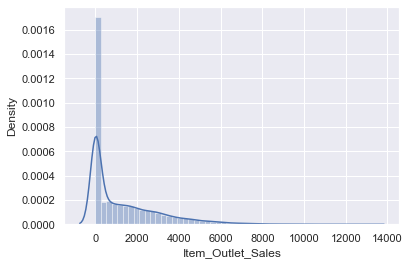

In [19]:
sns.distplot(df['Item_Outlet_Sales'])

In [20]:
print('Skewness: %f' % df['Item_Outlet_Sales'].skew())


Skewness: 1.544684


In [21]:
#lets see categorical and numerical variable
cat_cols = df.select_dtypes(exclude='number').columns.to_list()
num_cols = df.select_dtypes(include='number').columns.to_list()

print('Categorical Columns: ', cat_cols)
print('Numerical Columns: ', num_cols)

Categorical Columns:  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source']
Numerical Columns:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


In [22]:
#OR 
categorial_features = df.select_dtypes(include=[np.object])
categorial_features.head(5)


/var/folders/xm/32ndqcqn3cd87m2kphthm3vr0000gn/T/ipykernel_86320/397746932.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorial_features = df.select_dtypes(include=[np.object])


Item_Identifier Item_Fat_Content              Item_Type Outlet_Identifier  \
0           FDA15          Low Fat                  Dairy            OUT049   
1           DRC01          Regular            Soft Drinks            OUT018   
2           FDN15          Low Fat                   Meat            OUT049   
3           FDX07          Regular  Fruits and Vegetables            OUT010   
4           NCD19          Low Fat              Household            OUT013   

  Outlet_Size Outlet_Location_Type        Outlet_Type source  
0      Medium               Tier 1  Supermarket Type1  train  
1      Medium               Tier 3  Supermarket Type2  train  
2      Medium               Tier 1  Supermarket Type1  train  
3         NaN               Tier 3      Grocery Store  train  
4        High               Tier 3  Supermarket Type1  train

In [23]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.head(5)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   
2        17.50         0.016760  141.6180                       1999   
3        19.20         0.000000  182.0950                       1998   
4         8.93         0.000000   53.8614                       1987   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052

In [24]:
## exploring categories
for col in categorial_features:
    display(f"Column : {col}")
    display(df[col].value_counts())
    display("------------------------------------")

'Column : Item_Identifier'

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

'------------------------------------'

'Column : Item_Fat_Content'

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

'------------------------------------'

'Column : Item_Type'

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

'------------------------------------'

'Column : Outlet_Identifier'

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

'------------------------------------'

'Column : Outlet_Size'

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

'------------------------------------'

'Column : Outlet_Location_Type'

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

'------------------------------------'

'Column : Outlet_Type'

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

'------------------------------------'

'Column : source'

train    8523
test     5681
Name: source, dtype: int64

'------------------------------------'

In [25]:
##Above we can see Item fat content contains some missing code values.
##Some item types have very less numbers.

In [26]:
#lets see skewness
df.skew()

/var/folders/xm/32ndqcqn3cd87m2kphthm3vr0000gn/T/ipykernel_86320/1492543590.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

In [27]:
##above Item_Visibility need to process the skewness 

In [28]:
##lets fill the missind data now 
# filling the missing values in the Item_Weight column using the Mean value
df['Item_Weight'] .fillna(df['Item_Weight'].mean(), inplace = True)

In [29]:
# filling the missing values of Outlet_Size with the mode values
#We know that, the Outlet_size and Outlet_Type are related to each other. 
#So we are filling the missing values of the Outlet_Size by using the values in Outlet_Type.

#lets see how they r related first
# mode of the Outlet_size 
mode = pd.DataFrame(df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode())))
mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [30]:
#lets fill the missing value(MV) now
missing_value = df['Outlet_Size'].isnull()
df.loc[missing_value,'Outlet_Size'] =df.loc[missing_value,'Outlet_Type'].apply(lambda x: mode[x].Outlet_Size)



In [31]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
source                       0
dtype: int64

In [32]:
##our data is cleaned without any missing values now.

### feature engineering  

In [33]:
#now we will fix our item_fat_content 
#first modify Item_Fay_Content
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [34]:
#we can see that low fat and Low Fat is similar , Regular and reg is also similar so we will now fix it for
#futher analysis
df['Item_Fat_Content'] = df['Item_Fat_Content'] .replace({'LF':'Low Fat', 'reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [35]:
#now lets see how it looksdf_train['Count']=1
df['Count']=1
df_fat=df.groupby('Item_Fat_Content')['Count'].sum().reset_index()
fig2=px.pie(df_fat,values='Count',names='Item_Fat_Content',hole=0.3)

fig2.update_layout(title='Fat content',title_x=0.48,
                  annotations=[dict(text='Fat',font_size=15, showarrow=False,height=700,width=700)])
fig2.update_traces(textfont_size=15,textinfo='percent+label')
fig2.show()



In [36]:
#Now we will modify Item_Visibility as it was higly skewed
df['Item_Visibility'].value_counts()

0.000000    879
0.076841      3
0.077011      3
0.077169      3
0.076792      3
           ... 
0.162572      1
0.014826      1
0.058034      1
0.043786      1
0.104720      1
Name: Item_Visibility, Length: 13006, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.



((array([-3.89649086, -3.6760221 , -3.55519365, ...,  3.55519365,
          3.6760221 ,  3.89649086]),
  array([0.        , 0.        , 0.        , ..., 0.32363725, 0.32578081,
         0.32839095])),
 (0.049175892239377184, 0.06595278007399323, 0.95542468845349))

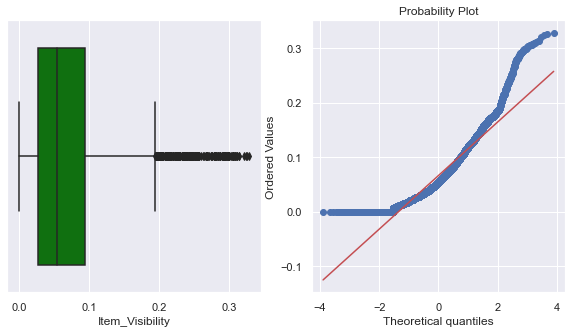

In [37]:
sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(df['Item_Visibility'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(df['Item_Visibility'],plot=ax2)

In [38]:
# print total number of 0s
print('Total of 0s before replace: ', sum(df['Item_Visibility'] == 0))

# replace 0s with the mean
df.loc[:,'Item_Visibility'].replace(to_replace=0,
                                            value= df['Item_Visibility'].mean(),
                                            inplace=True)

# print total number of 0s after the replace
print('Total of 0s after replace: ', sum(df['Item_Visibility'] == 0))

Total of 0s before replace:  879
Total of 0s after replace:  0


In [39]:
#The outliers in the Item outlet sales features are from 0.2

#Hence including only those observations which has values < 0.2

In [40]:
df[df['Item_Visibility']>0.2].shape[0]

240

In [41]:
#Hence, out of the approximately 8300 entries, we have only 240 entries which are outliers. 
#It would serve us well to simply remove these entries.

((array([-3.89235986, -3.67167022, -3.55071089, ...,  3.55071089,
          3.67167022,  3.89235986]),
  array([0.0035747 , 0.0035891 , 0.00359141, ..., 0.19982599, 0.19993588,
         0.19995527])),
 (0.04138651733394142, 0.06698340335384131, 0.9667002656746817))

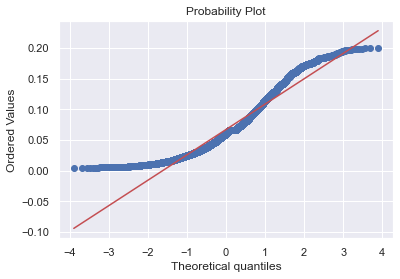

In [42]:
df=df[df['Item_Visibility']<0.2]
stats.probplot(df['Item_Visibility'],plot=plt)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



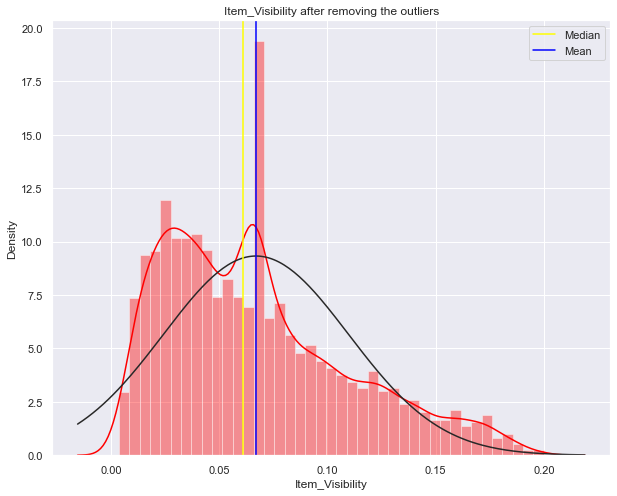

In [43]:
plt.figure(figsize=(10,8))
sns.distplot(df['Item_Visibility'], fit = norm, color='red')
plt.title('Item_Visibility after removing the outliers')
plt.axvline(df['Item_Visibility'].median(),color='yellow',label='Median')
plt.axvline(df['Item_Visibility'].mean(),color='blue',label='Mean')
plt.legend()

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

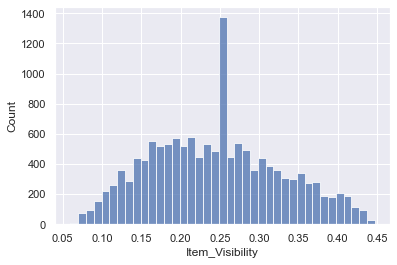

In [44]:
#OR
feature = 'Item_Visibility'
df[feature] = np.sqrt(df[feature])
sns.histplot(df[feature])

In [45]:
print ("Skewness :", df['Item_Visibility'].skew())
print("Kurtosis : ", df['Item_Visibility'].kurt())
#kurtosis>3 

Skewness : 0.19180131447387858
Kurtosis :  -0.6591148111030667


In [46]:
## NOw we will create new category for 'Item_Identifier'
#Get the first two characters of ID:
df['Item_category'] = df['Item_Identifier'].apply(lambda x : x[0:2])
df['Item_category'] = df['Item_category'].replace({'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
df['Item_category'].value_counts()

                                                    

Food              10005
Non-Consumable     2658
Drink              1301
Name: Item_category, dtype: int64

In [47]:
#Modify categories of Item_Fat_Content
#As you can see the low fat and regular in item_fat_content is
#written differently so first we need to correct it for further analysis because it represents the same thing.
## adding a new item item_fat_content category for non-consumable items
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()



Low Fat    9051
Regular    4913
Name: Item_Fat_Content, dtype: int64

In [48]:
# adding a new item item_fat_content category for non-consumable items
df.loc[df['Item_category'] == 'Non-Consumable', 'Item_Fat_Content'] = 'No Edible'
df['Item_Fat_Content'].value_counts()


Low Fat      6393
Regular      4913
No Edible    2658
Name: Item_Fat_Content, dtype: int64

In [49]:
df['Outlet_Establishment_Year']=(2023.0 -df['Outlet_Establishment_Year'])
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.126678   
1           DRC01         5.92          Regular         0.138846   
2           FDN15        17.50          Low Fat         0.129461   
3           FDX07        19.20          Regular         0.256813   
4           NCD19         8.93        No Edible         0.256813   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       24.0      Medium               Tier 1   
1                       14.0      Medium               Tier 3   
2                       24.0      Medium               Tier 1   
3                       25.0       Small               Tier 3   
4                       36.0        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  Count   Item_category  
0  Supermarket Type1          3735.1380  train      1            Food  
1  Supermarket Type2           443.4228  train      1           Drink  
2  Supermarket Type1          2097.2700  train      1            Food  
3      Grocery Store           732.3800  train      1            Food  
4  Supermarket Type1           994.7052  train      1  Non-Consumable

In [50]:
##Finally we have done feature engineering and data is cleaned too. 
#Now we will perform EDA to look into the data 


In [51]:
#lets see our clean data now
df.head(6)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.126678   
1           DRC01        5.920          Regular         0.138846   
2           FDN15       17.500          Low Fat         0.129461   
3           FDX07       19.200          Regular         0.256813   
4           NCD19        8.930        No Edible         0.256813   
5           FDP36       10.395          Regular         0.256813   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       24.0      Medium               Tier 1   
1                       14.0      Medium               Tier 3   
2                       24.0      Medium               Tier 1   
3                       25.0       Small               Tier 3   
4                       36.0        High               Tier 3   
5                       14.0      Medium               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  Count   Item_category  
0  Supermarket Type1          3735.1380  train      1            Food  
1  Supermarket Type2           443.4228  train      1           Drink  
2  Supermarket Type1          2097.2700  train      1            Food  
3      Grocery Store           732.3800  train      1            Food  
4  Supermarket Type1           994.7052  train      1  Non-Consumable  
5  Supermarket Type2           556.6088  train      1            Food

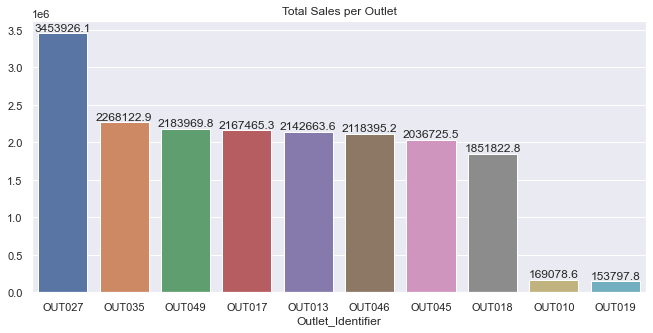

In [52]:
#lets see the outlet sales first
outlet_sales = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(11, 5))
ax = sns.barplot(x=outlet_sales.index, y=outlet_sales.values, order=outlet_sales.index)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.title('Total Sales per Outlet')
plt.show()


In [53]:
# we can see that Outlet OUT027 is doing well 

In [54]:
#Now lets see how does item visibilty in stores affects the sales

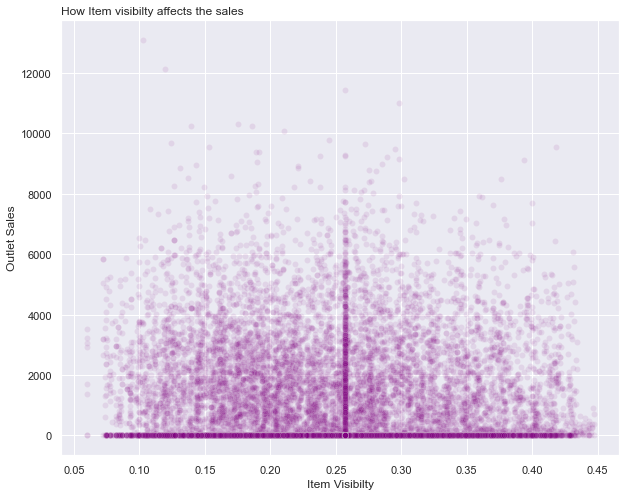

In [55]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df, alpha=0.09,color='purple' )
plt.xlabel('Item Visibilty')
plt.ylabel('Outlet Sales')
plt.title('How Item visibilty affects the sales', loc='left')
plt.show()

In [56]:
#we can see there is no relation clearly sales dosent go up 
#very low correlation between these two varialble
#As we can see, Item outlet sales sharply decreases for the most visible items.
#If the item visibility is less then 0.30, the sales are higher.

<AxesSubplot:>

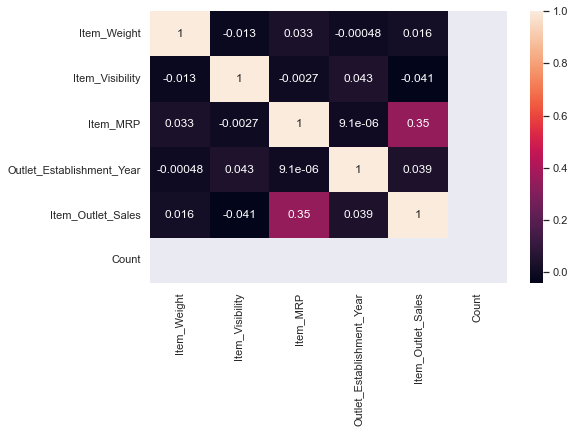

In [57]:
#Now lets see relation between mrp and sales
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)

In [58]:
#We can see MRP and Item outlet sales are correlated (0.35) 
#Item MRP and Item outlet sales shows positive correlation 
#which tells that as the MRP of the item increases the sales of that item also increases. 
#Similarly we can also notice that the item visibility and item outlet sales are negatively correlated 
#which means that if the item is less visible then the sale of the item is more or if the item is more 
#visible then the sale of the item is less..

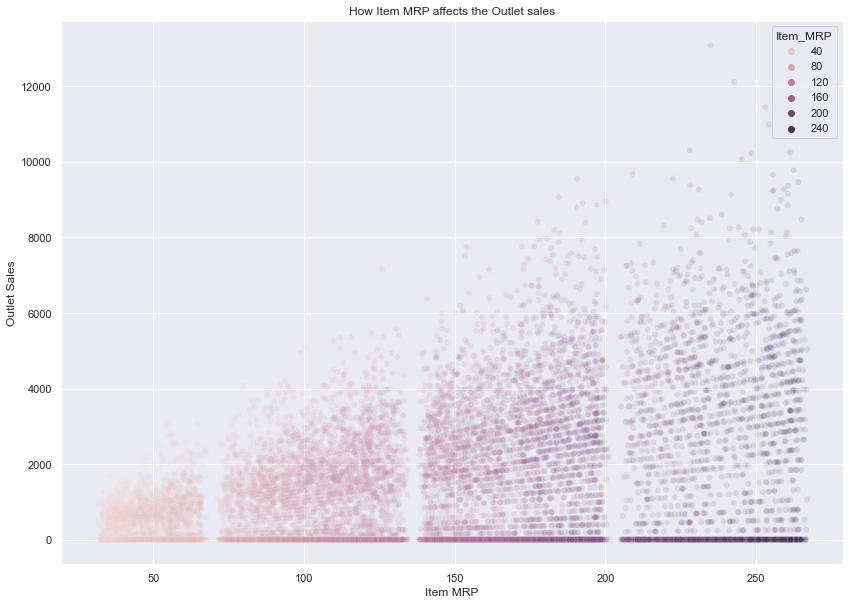

In [59]:
#lets see a scatter plot too
plt.figure(figsize = (14,10))
sns.scatterplot(y='Item_Outlet_Sales', x='Item_MRP', data=df, alpha=0.11,color='purple', hue='Item_MRP')
plt.xlabel('Item MRP')
plt.ylabel('Outlet Sales')
plt.title('How Item MRP affects the Outlet sales', loc='center')
plt.show()


In [60]:
#we can see the sale increasses with increasing mrp

In [61]:
#now Analysis of Item Visibility and Outlet Size

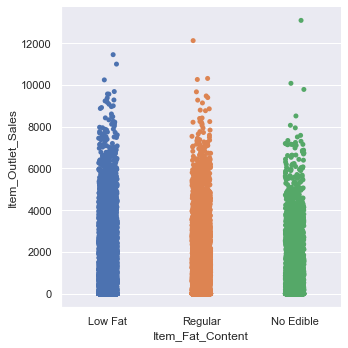

In [62]:
sns.catplot(x="Item_Fat_Content", y="Item_Outlet_Sales", data= df )

In [63]:
# Mean sales for Low fat and regular items and no edible seems to be similar
#There is not much relation between fat content and item outlet sales.

In [64]:
#Now Analysis of Item Type and Item Outlet Sales

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

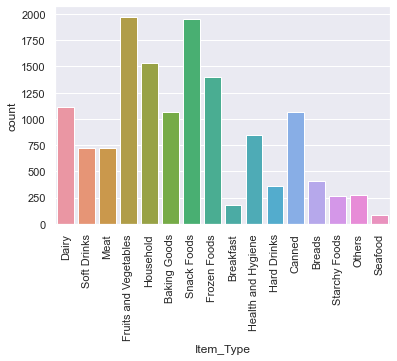

In [65]:
labels = list(df['Item_Type'].unique())
chart = sns.countplot(x= df['Item_Type'])
chart.set_xticklabels(labels=labels, rotation=90)

In [66]:
# Vegetables and fruits , and frozen food  contribute towards the item outlet sales 
#whereas seafood is least selling


In [67]:
# What is the average sales by outlet type?
#  How does sales vary by outlet type?


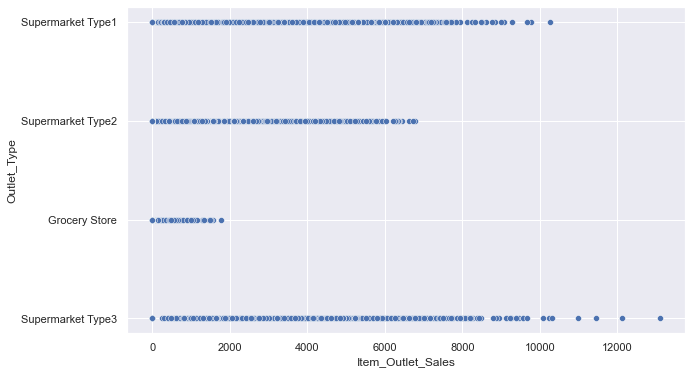

In [68]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Item_Outlet_Sales',y = 'Outlet_Type',data=df)
plt.show()

In [69]:
#supermarket type 3 has more sales and grocery store the least

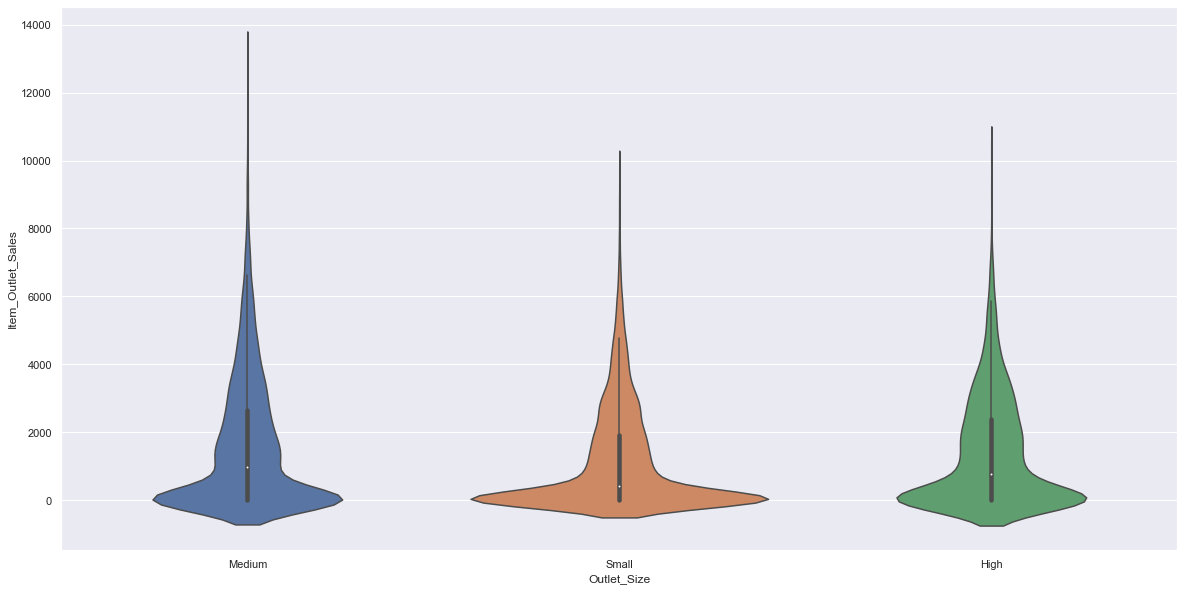

In [70]:
#now Analysis of Outlet Size and Item Outlet Sales
plt.figure(figsize=(20, 10))
fig = sns.violinplot(x='Outlet_Size', y="Item_Outlet_Sales", data=df)
plt.show()


In [71]:
#Medium size outlets has given the most item outlet sales.

#### At this stage I guess we are done with the data exploration Lets try some ML algorithms on this data to predict the sales.


In [72]:
#feature selection

In [73]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.126678   
1           DRC01         5.92          Regular         0.138846   
2           FDN15        17.50          Low Fat         0.129461   
3           FDX07        19.20          Regular         0.256813   
4           NCD19         8.93        No Edible         0.256813   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       24.0      Medium               Tier 1   
1                       14.0      Medium               Tier 3   
2                       24.0      Medium               Tier 1   
3                       25.0       Small               Tier 3   
4                       36.0        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  Count   Item_category  
0  Supermarket Type1          3735.1380  train      1            Food  
1  Supermarket Type2           443.4228  train      1           Drink  
2  Supermarket Type1          2097.2700  train      1            Food  
3      Grocery Store           732.3800  train      1            Food  
4  Supermarket Type1           994.7052  train      1  Non-Consumable

In [74]:
# Step 4. Feature Engineering : 
# Skewness/Inconsistent/Missing/Outlier Handling, 
# Feature Enrichment, Feature Transformation, Feature Selection, Feature Encoding, 
# Feature Scaling (Normalization & Standardization)

In [75]:
#drop Outlet_Establishment_year
df.drop('Outlet_Establishment_Year',axis = 1,inplace=True)
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'source',
       'Count', 'Item_category'],
      dtype='object')

In [76]:
df.drop('Count',axis = 1,inplace=True)
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'source',
       'Item_category'],
      dtype='object')

In [77]:
#we will use all features

In [78]:
#lets see how our data looks like now
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.126678   
1           DRC01         5.92          Regular         0.138846   
2           FDN15        17.50          Low Fat         0.129461   
3           FDX07        19.20          Regular         0.256813   
4           NCD19         8.93        No Edible         0.256813   

               Item_Type  Item_MRP Outlet_Identifier Outlet_Size  \
0                  Dairy  249.8092            OUT049      Medium   
1            Soft Drinks   48.2692            OUT018      Medium   
2                   Meat  141.6180            OUT049      Medium   
3  Fruits and Vegetables  182.0950            OUT010       Small   
4              Household   53.8614            OUT013        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales source  \
0               Tier 1  Supermarket Type1          3735.1380  train   
1               Tier 3  Supermarket Type2           443.4228  train   
2               Tier 1  Supermarket Type1          2097.2700  train   
3               Tier 3      Grocery Store           732.3800  train   
4               Tier 3  Supermarket Type1           994.7052  train   

    Item_category  
0            Food  
1           Drink  
2            Food  
3            Food  
4  Non-Consumable

In [79]:
# we removed the number to make it more suitable for modeling
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x: x[:-2])

df['Item_Identifier'].unique()


array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRA', 'NCF',
       'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM', 'NCU',
       'DRY', 'NCW', 'DRM', 'DRE', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

In [80]:
#Encoding 
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [81]:
obj = [feature for feature in df.columns if df[feature].dtypes == 'O' and feature!='source']
obj

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_category']

In [82]:
for i in obj:
    df[i]=encoder.fit_transform(df[i].values.reshape(-1,1))
    #reshape(-1, 1) if your data has a single feature or array. reshape(1, -1) if it contains a single sample

In [83]:
df.dtypes

Item_Identifier         float64
Item_Weight             float64
Item_Fat_Content        float64
Item_Visibility         float64
Item_Type               float64
Item_MRP                float64
Outlet_Identifier       float64
Outlet_Size             float64
Outlet_Location_Type    float64
Outlet_Type             float64
Item_Outlet_Sales       float64
source                   object
Item_category           float64
dtype: object

In [84]:
df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0             19.0         9.30               0.0         0.126678        4.0   
1              2.0         5.92               2.0         0.138846       14.0   
2             32.0        17.50               0.0         0.129461       10.0   
3             42.0        19.20               2.0         0.256813        6.0   
4             48.0         8.93               1.0         0.256813        9.0   

   Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Location_Type  \
0  249.8092                9.0          1.0                   0.0   
1   48.2692                3.0          1.0                   2.0   
2  141.6180                9.0          1.0                   0.0   
3  182.0950                0.0          2.0                   2.0   
4   53.8614                1.0          0.0                   2.0   

   Outlet_Type  Item_Outlet_Sales source  Item_category  
0          1.0          3735.1380  train            1.0  
1          2.0           443.4228  train            0.0  
2          1.0          2097.2700  train            1.0  
3          0.0           732.3800  train            1.0  
4          1.0           994.7052  train            2.0

In [85]:
#scaling the data

In [86]:
from sklearn.preprocessing import MinMaxScaler
Minmax =MinMaxScaler()


In [87]:
df.iloc[:,:-3]=Minmax.fit_transform(df.iloc[:,:-3])
#iloc[:, 0:2] selects the columns until (excluding) the last two columns 


In [88]:
df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0         0.271429     0.282525               0.0         0.172673   0.266667   
1         0.028571     0.081274               1.0         0.204085   0.933333   
2         0.457143     0.770765               0.0         0.179857   0.666667   
3         0.600000     0.871986               1.0         0.508613   0.400000   
4         0.685714     0.260494               0.5         0.508613   0.600000   

   Item_MRP  Outlet_Identifier  Outlet_Size  Outlet_Location_Type  \
0  0.927507           1.000000          0.5                   0.0   
1  0.072068           0.333333          0.5                   1.0   
2  0.468288           1.000000          0.5                   0.0   
3  0.640093           0.000000          1.0                   1.0   
4  0.095805           0.111111          0.0                   1.0   

   Outlet_Type  Item_Outlet_Sales source  Item_category  
0     0.333333          3735.1380  train            1.0  
1     0.666667           443.4228  train            0.0  
2     0.333333          2097.2700  train            1.0  
3     0.000000           732.3800  train            1.0  
4     0.333333           994.7052  train            2.0

In [89]:
#Now separating the dataset to train and test dataset
# Step 5. Dataset Partition : 
# Train Test Split 
# Step 6. Data Modelling : 
# Try many ML methods
# Step 7. Data Evaluation : 
# Display Metrics for Classification (Accuracy, Precision, Recall), 
# Display Metrics for Regression (R2Score, MSE, RMSE)
# Step 8. Hyper-parameter Tuning : 
# Tuning parameters: Cross Validation (CV), GridSearchCV, Regularization (L1, L2 penalty)
# Step 9. Build the pipeline with the best Model with the best parameters
# Choose best hyper-parameters and build best models
# Step 10. Conclusion

In [90]:
X= df[df['source'] == 'train'].drop(columns = ['Item_Outlet_Sales','source'])
y = df.loc[X.index,'Item_Outlet_Sales']

In [91]:
X.shape , y.shape

((8389, 11), (8389,))

In [92]:
#Train test spli

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)
len(X_train),len(X_test),len(y_train),len(y_test)

(5872, 2517, 5872, 2517)

### EXPLORING DIFFERENT MODELS

###### Linear Regression using Statsmodels API

In [94]:
import statsmodels.api as sm
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.811
Method:                 Least Squares   F-statistic:                              2293.
Date:                Mon, 20 Feb 2023   Prob (F-statistic):                        0.00
Time:                        00:18:27   Log-Likelihood:                         -49909.
No. Observations:                5872   AIC:                                  9.984e+04
Df Residuals:                    5861   BIC:                                  9.991e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

#### Linear Regression using Scikit Learn

In [95]:
# Linear Regression
lm = LinearRegression().fit(X_train, y_train)
y_predict = lm.predict(X_train)
y_test_predict = lm.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print('Root Mean squared error(Train): {:.2f}'.format(np.sqrt(mean_squared_error(y_train , y_predict))))
print('Root Mean squared error(Test): {:.2f}'.format(np.sqrt(mean_squared_error(y_test , y_test_predict))))
print('r2_score (linear model): {:.2f}'.format(r2_score(y_train, y_predict)))

Linear model, coefficients:  [  26.3664243   -24.45134433   25.67586429 -263.10825418   40.19054458
 3646.08496213  364.63701496 -268.04467329 -340.75404207 2489.19330195
  -13.57991426]
Root Mean squared error(Train): 1188.27
Root Mean squared error(Test): 1246.80
r2_score (linear model): 0.49


In [96]:
#lets built pipelines

In [97]:
model_score = pd.DataFrame(columns=['model', 'rmse', 'r2_score'])

In [98]:
from sklearn.pipeline import make_pipeline

In [101]:
# df to store model error and scores
model_scores = pd.DataFrame(columns=['model', 'rmse', 'r2_score'])

In [102]:
def train_and_evaluate_model(model_name, model, X, y):
    '''
    Create a training pipeline to scale and train the model
    using the input data, then evaluate the model and safe its error
    and score in the scores dataframe.
    '''
    # split the data
    X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # create a training pipeline
    pipeline = make_pipeline(StandardScaler(), model)
    
    # apply scaling on training data and train the model
    pipeline.fit(X_train, y_train)
    
    # predict the validation set
    y_hat = pipeline.predict(X_validate)
    
    # evaluate the model
    rmse = np.sqrt(mean_squared_error(y_validate, y_hat))
    model_score = r2_score(y_validate, y_hat)
    
    # adding error and score, to the scores datafrane
    model_scores.loc[len(model_scores)] = [model_name, rmse, model_score]
    
    print('----------------------------------')
    print(model_name, ' Report:')
    print('----------------------------------')
    print('RMSE: ', rmse)
    print('R2 Score: ', model_score)


#### Ridge Regularisation

In [103]:
lr = LinearRegression()
train_and_evaluate_model('Linear Regression', lr, X, y)

----------------------------------
Linear Regression  Report:
----------------------------------
RMSE:  1221.6351489975948
R2 Score:  0.48363548584042493


#### Decision tree

In [104]:
Dt = DecisionTreeRegressor()
train_and_evaluate_model('Decision Tree', Dt, X,y)

----------------------------------
Decision Tree  Report:
----------------------------------
RMSE:  1571.5855519341662
R2 Score:  0.1454265334769922


#### SVM

In [105]:
svr_model = SVR()
train_and_evaluate_model('SVM', svr_model, X, y)

----------------------------------
SVM  Report:
----------------------------------
RMSE:  1653.0180091186342
R2 Score:  0.054571871251165915


### xgbr

In [106]:

xgbr_model = XGBRegressor()
train_and_evaluate_model('XGBoost', xgbr_model, X, y)

----------------------------------
XGBoost  Report:
----------------------------------
RMSE:  1185.6810225624783
R2 Score:  0.5135826169438922


### Random forest

In [107]:

rfr_model = RandomForestRegressor()
train_and_evaluate_model('Random Forest', rfr_model, X, y)

----------------------------------
Random Forest  Report:
----------------------------------
RMSE:  1142.3312904252523
R2 Score:  0.5485002696004899


### Lasso

In [108]:
# lasso
lasso_model = Lasso()
train_and_evaluate_model('Lasso', lasso_model, X, y)

----------------------------------
Lasso  Report:
----------------------------------
RMSE:  1221.5536383764056
R2 Score:  0.48370438986335584


### Linear 

In [109]:
linear_regression_model = LinearRegression()
train_and_evaluate_model('Linear Regression', linear_regression_model, X, y)

----------------------------------
Linear Regression  Report:
----------------------------------
RMSE:  1221.6351489975948
R2 Score:  0.48363548584042493


In [110]:
model_scores

model         rmse  r2_score
0  Linear Regression  1221.635149  0.483635
1      Decision Tree  1571.585552  0.145427
2                SVM  1653.018009  0.054572
3            XGBoost  1185.681023  0.513583
4      Random Forest  1142.331290  0.548500
5              Lasso  1221.553638  0.483704
6  Linear Regression  1221.635149  0.483635

In [111]:
#Since only Random forest performed fine we will discard all other models

In [112]:
##lets try more models

### LightGBM

In [113]:
from lightgbm import LGBMRegressor

In [114]:
lgb=LGBMRegressor()
train_and_evaluate_model('LGBM Regressor' , lgb, X,y)


----------------------------------
LGBM Regressor  Report:
----------------------------------
RMSE:  1124.8631693168938
R2 Score:  0.5622030379274904


### Gradient boost regressor

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

In [116]:
gbdt=GradientBoostingRegressor()
train_and_evaluate_model('GradientBoostingRegressor',gbdt,X,y)

----------------------------------
GradientBoostingRegressor  Report:
----------------------------------
RMSE:  1102.2954124120372
R2 Score:  0.579593570644503


In [117]:
model_scores
model_scores

model         rmse  r2_score
0          Linear Regression  1221.635149  0.483635
1              Decision Tree  1571.585552  0.145427
2                        SVM  1653.018009  0.054572
3                    XGBoost  1185.681023  0.513583
4              Random Forest  1142.331290  0.548500
5                      Lasso  1221.553638  0.483704
6          Linear Regression  1221.635149  0.483635
7             LGBM Regressor  1124.863169  0.562203
8  GradientBoostingRegressor  1102.295412  0.579594

In [118]:
#we can see that GBR , LGBM and random did bette rthan any other model

### lets test our model 
## Model Testing 

In [119]:
train_data['source']='train'
test_data['source']='test'
test_data['Item_Outlet_Sales'] = 0
df = pd.concat([train_data, test_data],ignore_index=True,sort= False)
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  
0  Supermarket Type1          3735.1380  train  
1  Supermarket Type2           443.4228  train  
2  Supermarket Type1          2097.2700  train  
3      Grocery Store           732.3800  train  
4  Supermarket Type1           994.7052  train

In [120]:
df['Item_Weight'] .fillna(df['Item_Weight'].mean(), inplace = True)

In [121]:
mode = pd.DataFrame(df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode())))
mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [122]:
missing_value = df['Outlet_Size'].isnull()
df.loc[missing_value,'Outlet_Size'] =df.loc[missing_value,'Outlet_Type'].apply(lambda x: mode[x].Outlet_Size)


In [123]:
df['Item_Fat_Content'] = df['Item_Fat_Content'] .replace({'LF':'Low Fat', 'reg':'Regular','low fat':'Low Fat'})


In [124]:
# print total number of 0s
print('Total of 0s before replace: ', sum(df['Item_Visibility'] == 0))

# replace 0s with the mean
df.loc[:,'Item_Visibility'].replace(to_replace=0,
                                            value= df['Item_Visibility'].mean(),
                                            inplace=True)

# print total number of 0s after the replace
print('Total of 0s after replace: ', sum(df['Item_Visibility'] == 0))

Total of 0s before replace:  879
Total of 0s after replace:  0


((array([-3.89235986, -3.67167022, -3.55071089, ...,  3.55071089,
          3.67167022,  3.89235986]),
  array([0.0035747 , 0.0035891 , 0.00359141, ..., 0.19982599, 0.19993588,
         0.19995527])),
 (0.04138651733394142, 0.06698340335384131, 0.9667002656746817))

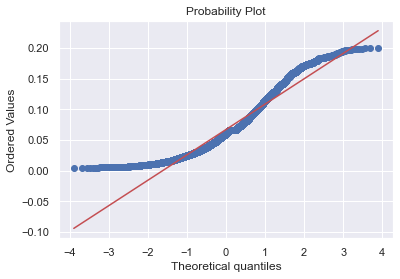

In [125]:
df=df[df['Item_Visibility']<0.2]
stats.probplot(df['Item_Visibility'],plot=plt)

In [126]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    9051
Regular    4913
Name: Item_Fat_Content, dtype: int64

In [127]:
df['Outlet_Establishment_Year']=(2023.0 -df['Outlet_Establishment_Year'])
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.065953   
4           NCD19         8.93          Low Fat         0.065953   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       24.0      Medium               Tier 1   
1                       14.0      Medium               Tier 3   
2                       24.0      Medium               Tier 1   
3                       25.0       Small               Tier 3   
4                       36.0        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales source  
0  Supermarket Type1          3735.1380  train  
1  Supermarket Type2           443.4228  train  
2  Supermarket Type1          2097.2700  train  
3      Grocery Store           732.3800  train  
4  Supermarket Type1           994.7052  train

In [128]:
df.drop('Outlet_Establishment_Year',axis = 1,inplace=True)


In [129]:
df['Item_Identifier']=df['Item_Identifier'].apply(lambda x: x[:-2])

In [130]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [131]:
obj = [feature for feature in df.columns if df[feature].dtypes == 'O' and feature!='source']
obj

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [132]:
for i in obj:
    df[i]=encoder.fit_transform(df[i].values.reshape(-1,1))

In [133]:
from sklearn.preprocessing import MinMaxScaler
Minmax =MinMaxScaler()
df.iloc[:,:-3]=Minmax.fit_transform(df.iloc[:,:-3])

In [134]:
df.iloc[:,:-2]

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0             0.271429     0.282525               0.0         0.063512   
1             0.028571     0.081274               1.0         0.079965   
2             0.457143     0.770765               0.0         0.067142   
3             0.600000     0.871986               1.0         0.317639   
4             0.685714     0.260494               0.0         0.317639   
...                ...          ...               ...              ...   
14199         0.285714     0.353974               1.0         0.050523   
14200         0.314286     0.181304               1.0         0.709929   
14201         0.842857     0.324204               0.0         0.356216   
14202         0.400000     0.639774               1.0         0.317639   
14203         0.557143     0.294433               1.0         0.515048   

       Item_Type  Item_MRP  Outlet_Identifier  Outlet_Size  \
0       0.266667  0.927507           1.000000          0.5   
1       0.933333  0.072068           0.333333          0.5   
2       0.666667  0.468288           1.000000          0.5   
3       0.400000  0.640093           0.000000          1.0   
4       0.600000  0.095805           0.111111          0.0   
...          ...       ...                ...          ...   
14199   0.866667  0.467004           0.888889          1.0   
14200   1.000000  0.585126           0.333333          0.5   
14201   0.533333  0.371199           0.777778          1.0   
14202   0.200000  0.778154           0.222222          1.0   
14203   0.200000  0.205884           0.777778          1.0   

       Outlet_Location_Type  Outlet_Type  
0                       0.0          1.0  
1                       1.0          2.0  
2                       0.0          1.0  
3                       1.0          0.0  
4                       1.0          1.0  
...                     ...          ...  
14199                   0.0          1.0  
14200                   1.0          2.0  
14201                   0.5          1.0  
14202                   0.5          1.0  
14203                   0.5          1.0  

[13964 rows x 10 columns]

In [136]:
model_pipeline = make_pipeline(StandardScaler(), GradientBoostingRegressor(),)
model_pipeline.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [ ]:
y_hat = model_pipeline.predict(test_data)

# displaying results
results['prediction'] = y_hat
results
